In [6]:
import requests
import datetime as dt
from matplotlib import pyplot as plt
import pandas as pd
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

## Carga de datos y clasificación con __Python__. 

###  Fuente de Datos 

Los datos se obtuvieron de una API gratuita para datos sobre el  nuevo coronavirus (covid-19) https://covid19api.com/. De esta manera los datos se pueden ir actualizando de forma automática. 

Se seleccionó a México, Suecia, Nueva Zelanda y España.

In [4]:
url= "https://api.covid19api.com/dayone/country/mexico/status/confirmed/live" 

### Carga de datos

Se obtienen y se convierten datos a <ins> json </ins>. Despues se asignan dos variables para los casos confirmados y las fechas. Para poder hacerlo se importa __requests__ y __json__ 

In [5]:
response= requests.get(url)
datos= response.json()
casos_mexico = []
fechas_mexico = []

### Arreglo de datos

Se agregan los datos y se le da un formato de fecha a la columna "Date", pues ésta era un objeto.

In [6]:
for x in datos:
    casos_mexico.append(x["Cases"])
    fecha = dt.datetime.strptime(x["Date"][0:10], "%Y-%m-%d")
    fechas_mexico.append(fecha)

Se hace lo mismo para los países seleccionados

In [7]:
r = requests.get("https://api.covid19api.com/dayone/country/spain/status/confirmed/live")
datos_spain = r.json()
casos_spain = [ x["Cases"] for x in datos_spain ]
fechas_spain = [ dt.datetime.strptime(x["Date"][0:10], "%Y-%m-%d") for x in datos_spain ]

In [8]:
r = requests.get("https://api.covid19api.com/dayone/country/new-zealand/status/confirmed/live")
datos_nz = r.json()
casos_nz = [ x["Cases"] for x in datos_nz ]
fechas_nz = [ dt.datetime.strptime(x["Date"][0:10], "%Y-%m-%d") for x in datos_nz ]

In [9]:
r = requests.get("https://api.covid19api.com/dayone/country/sweden/status/confirmed/live")
datos_sweden = r.json()
casos_sweden = [ x["Cases"] for x in datos_sweden ]
fechas_sweden = [ dt.datetime.strptime(x["Date"][0:10], "%Y-%m-%d") for x in datos_sweden ]

Ahora que se tienen los datos en el formato correspondiente, con __pandas__ hacemos un dataframe por país. Sin embargo, la API no tiene un registro de los casos de forma homogénea, por lo que se tuvieron que eliminar algunos datos para tener la misma dimensión a la hora de concatenar. Se editó de tal manera que los datos de los demás países coincidieran con los de México.

In [10]:
df_sweden = pd.DataFrame({
    'Fechas': fechas_sweden,
    'Sweden': casos_sweden,})
df_sweden= df_sweden.drop(range(28),axis=0)
df_suecia= df_sweden.reset_index(drop=True)

In [11]:
df_spain = pd.DataFrame({
    'Spain': casos_spain})
df_spain= df_spain.drop(range(27),axis=0)
df_spain= df_spain.reset_index(drop=True)
df_españa= df_spain



__Nota:__ Para el caso de Nueva Zelanda no se hizo lo mismo, pues los registros coincidian con los de México.

In [12]:
df_nz = pd.DataFrame({
    'New Zealand': casos_nz})
            

In [13]:
df_mex = pd.DataFrame({
    'Mexico': casos_mexico,
    })


Ahora se hace un mismo dataframe de los casos confirmados

In [106]:
df_countries= pd.concat([df_suecia, df_mex, df_españa, df_nz], axis=1)
                                                                 
df_confirm= df_countries.reset_index(drop=True)
df_confirm

,Fechas,Sweden,Mexico,Spain,New Zealand
0,2020-02-28,11,1,32,1
1,2020-02-29,14,4,45,1
2,2020-03-01,14,5,84,1
3,2020-03-02,19,5,120,1
4,2020-03-03,32,5,165,1
...,...,...,...,...,...
223,2020-10-08,97532,804488,848324,1866
224,2020-10-09,98451,810020,861112,1870
225,2020-10-10,98451,814328,861112,1871
226,2020-10-11,98451,817503,861112,1871


Se puede observar que hasta hoy, España tiene el mayor número de casos confirmados y México le seguiría. Sin embargo, en el número de muertos por el covid-19, no se esperan los mismos resultados como se muestra a continuación.

## Muertes

Ahora se toma la información para los registros de muertes por causa del virus SARS-COV-2

Se hace el mismo procedimiento que en los casos confirmados

In [69]:
url2= "https://api.covid19api.com/dayone/country/mexico/status/deaths/live"

In [70]:
#Obtenemos y convertimos datos a json
respuesta= requests.get(url2)
datos2= respuesta.json()
deaths_mexico = []
fecha_mexico = []

In [71]:
for dato in datos2:
    deaths_mexico.append(dato["Cases"])
    fecha = dt.datetime.strptime(dato["Date"][0:10], "%Y-%m-%d")
    fecha_mexico.append(fecha)

In [72]:
r = requests.get("https://api.covid19api.com/dayone/country/spain/status/deaths/live")
datos_muertes_spain = r.json()
deaths_spain = [ dato["Cases"] for dato in datos_muertes_spain ]
fecha_spain = [ dt.datetime.strptime(dato["Date"][0:10], "%Y-%m-%d") for dato in datos_muertes_spain ]

In [73]:
r = requests.get("https://api.covid19api.com/dayone/country/sweden/status/deaths/live")
datos_muertes_sweden = r.json()
deaths_sweden = [ dato["Cases"] for dato in datos_muertes_sweden ]
fecha_sweden = [ dt.datetime.strptime(dato["Date"][0:10], "%Y-%m-%d") for dato in datos_muertes_sweden ]

In [74]:
r = requests.get("https://api.covid19api.com/dayone/country/new-zealand/status/deaths/live")
datos_muertes_nz = r.json()
deaths_nz = [ dato["Cases"] for dato in datos_muertes_nz ]
fecha_nz = [ dt.datetime.strptime(dato["Date"][0:10], "%Y-%m-%d") for dato in datos_muertes_nz ]

In [75]:
df_deaths_spain = pd.DataFrame({
    'Fecha': fecha_spain,
    'Spain': deaths_spain})
df_deaths_spain= df_deaths_spain.drop(range(27),axis=0)
df_deaths_spain= df_deaths_spain.reset_index(drop=True) 
df_muertes_españa= df_deaths_spain


In [76]:
df_deaths_sweden = pd.DataFrame({
    'Sweden': deaths_sweden,})
df_deaths_sweden= df_deaths_sweden.drop(range(28),axis=0)
df_deaths_sweden= df_deaths_sweden.reset_index(drop=True)
df_muertes_suecia= df_deaths_sweden

In [77]:
df_deaths_nz = pd.DataFrame({
    'New Zealand': deaths_nz,})


In [78]:
df_deaths_mex= pd.DataFrame({
    'Mexico': deaths_mexico})

In [97]:
df_countries_deaths= pd.concat([df_muertes_españa, df_deaths_mex, df_muertes_suecia, df_deaths_nz], axis=1)
df_countries_deaths= df_countries_deaths.reset_index(drop=True)
df_countries_deaths

,Fecha,Spain,Mexico,Sweden,New Zealand
0,2020-02-28,0,0,0,0
1,2020-02-29,0,0,0,0
2,2020-03-01,0,0,0,0
3,2020-03-02,0,0,0,0
4,2020-03-03,1,0,0,0
...,...,...,...,...,...
223,2020-10-08,32688,83096,5892,25
224,2020-10-09,32929,83497,5894,25
225,2020-10-10,32929,83642,5894,25
226,2020-10-11,32929,83781,5894,25


A pesar de que España tiene mas casos confirmados, a simple vista se observa que México tiene el mayor número de muertos. Esto puede ser debido al diseño de las políticas en materia de salud de cada país, principalmente.

## Recuperados
Ahora se obtienen los datos de los registros de las personas recuperadas por causa del virus SARS-COV-2.

De igual manera se hace lo mismo que en los casos anteriores.


In [80]:
url3="https://api.covid19api.com/dayone/country/mexico/status/recovered/live"

In [81]:
#Datos a JSON de los casos recuperados
response3= requests.get(url3)
datos3= response3.json()
recovered_mex=[]
fecha_mex=[]

In [82]:
for x in datos3:
    recovered_mex.append(x["Cases"])
    fecha= dt.datetime.strptime(x["Date"][0:10], "%Y-%m-%d")
    fecha_mex.append(fecha)
    

In [83]:
r = requests.get("https://api.covid19api.com/dayone/country/spain/status/recovered/live")
datos_recuperados_spain = r.json()
recovered_spain = [x["Cases"] for x in datos_recuperados_spain]

In [84]:
r = requests.get("https://api.covid19api.com/dayone/country/new-zealand/status/recovered/live")
datos_recuperados_nz = r.json()
recovered_nz = [x["Cases"] for x in datos_recuperados_nz]

In [85]:
r = requests.get("https://api.covid19api.com/dayone/country/sweden/status/recovered/live")
datos_recuperados_sweden = r.json()
recovered_sweden = [x["Cases"] for x in datos_recuperados_sweden]

In [86]:
df_recovered_mex= pd.DataFrame({
    'Fecha': fecha_mex,
    'Mexico': recovered_mex,
     })


In [87]:
df_recovered_spain = pd.DataFrame({
    'Spain': recovered_spain})
df_recovered_spain= df_recovered_spain.drop(range(27),axis=0)
df_recovered_spain= df_recovered_spain.reset_index(drop=True) 
df_recuperados_españa= df_recovered_spain

In [88]:
df_recovered_sweden = pd.DataFrame({
    'Sweden': recovered_sweden})
df_recovered_sweden= df_recovered_sweden.drop(range(28),axis=0)
df_recovered_sweden= df_recovered_sweden.reset_index(drop=True) 
df_recuperados_suecia= df_recovered_sweden

In [89]:
df_recovered_nz = pd.DataFrame({
    'New Zealand': recovered_nz,})


In [107]:
df_countries_recovered= pd.concat([df_recovered_mex, df_recovered_spain, df_recovered_sweden, df_recovered_nz], axis=1)
df_countries_recovered= df_countries_recovered.reset_index(drop=True)
df_countries_recovered

,Fecha,Mexico,Spain,Sweden,New Zealand
0,2020-02-28,0,2,0,0
1,2020-02-29,0,2,0,0
2,2020-03-01,0,2,0,0
3,2020-03-02,0,2,0,0
4,2020-03-03,1,2,0,0
...,...,...,...,...,...
223,2020-10-08,682604,150376,0,1800
224,2020-10-09,687123,150376,0,1801
225,2020-10-10,689377,150376,0,1801
226,2020-10-11,694214,150376,0,1801


## Información sobre pruebas para covid-19 por país

### Carga de datos: 
La información de descargó del sitio https://ourworldindata.org/ 

Con ayuda de __pandas__ se carga la información.

In [109]:
df_paises= pd.read_csv('paises_covid.csv') 

In [110]:
df_paises['date']= [dt.datetime.strptime(x, '%Y-%m-%d') for x in df_paises['date']]  #Modificar la fecha(obj) a datetime
df_paises.set_index('date', inplace= True)

Se seleciona un periodo específico y se eliminan los valores nulos o "na"

In [94]:
df_paises= df_paises.loc['2020-02-28': '2020-10-08']
df_paises.dropna()

,location,total_cases,total_tests_per_thousand,positive_rate,total_tests,new_deaths_per_million,hospital_beds_per_thousand,total_deaths
date,,,,,,,,
2020-04-23,Spain,203649.0,22.148,0.235,1035522.0,9.411,2.97,22157.0
2020-04-30,Spain,215183.0,28.898,0.037,1351130.0,5.732,2.97,24543.0
2020-05-07,Spain,222045.0,34.760,0.025,1625211.0,4.556,2.97,26070.0
2020-05-14,Spain,229540.0,41.053,0.025,1919411.0,4.641,2.97,27321.0
2020-05-21,Spain,233037.0,47.514,0.012,2221497.0,1.112,2.97,27940.0
...,...,...,...,...,...,...,...,...
2020-10-04,New Zealand,1498.0,203.810,0.001,982819.0,0.000,2.61,25.0
2020-10-05,New Zealand,1499.0,204.395,0.001,985639.0,0.000,2.61,25.0
2020-10-06,New Zealand,1502.0,205.501,0.001,990973.0,0.000,2.61,25.0


### Visualización de datos con Matplotlib

Para la representación de los datos se utilizó la libreria __matplotlib__ que permite la visualización de gráficas.

A continuación se generaron 6 gráficas con la función __subplots__ donde se muestran a continuación:

Text(0, 0.5, '%')

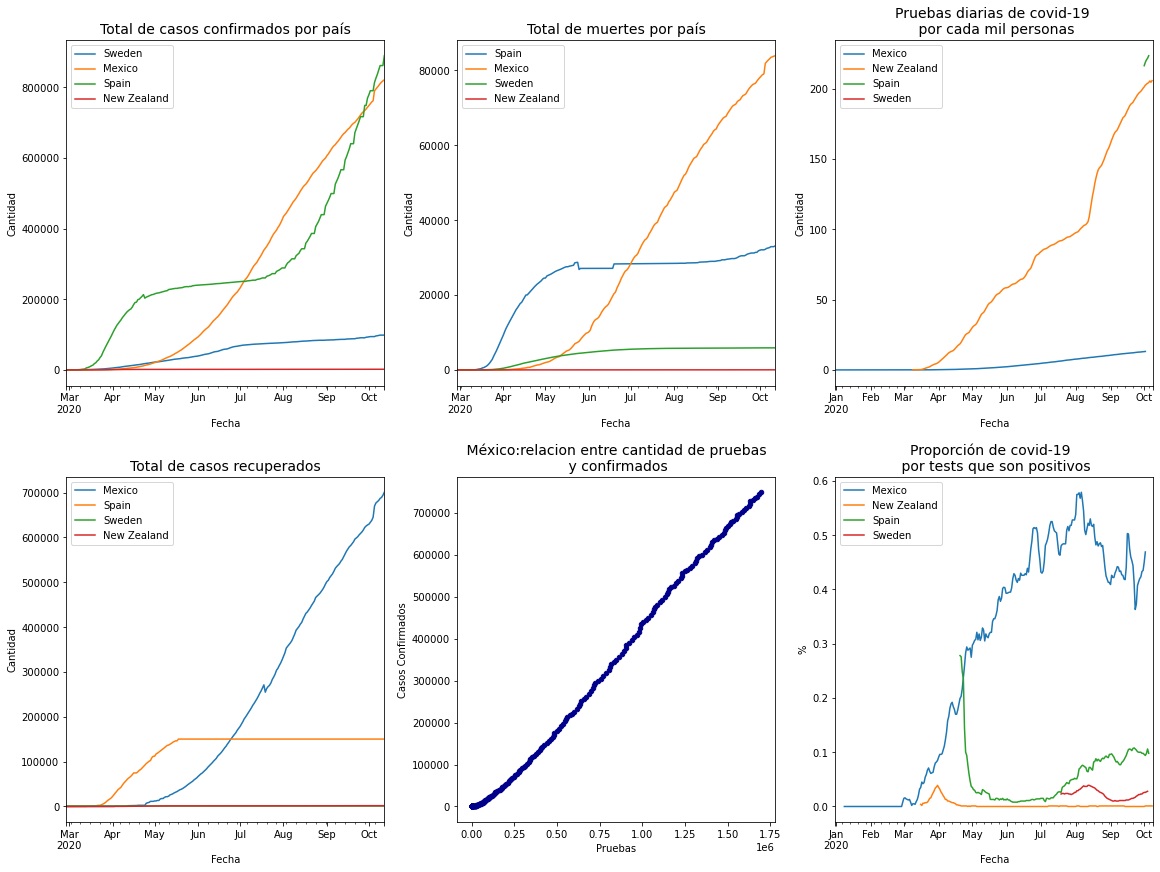

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize= (16,12),  constrained_layout=True) #Funcion Subplots

df_confirm.plot(ax=axes[0,0], legend= True, x= 'Fechas',) #Grafica casos confirmados
df_countries_deaths.plot(ax=axes[0,1], legend= True, x='Fecha') #Grafica muertos
df_countries_recovered.plot(ax=axes[1,0], legend= True, x='Fecha')#Gráfica recuperados
df_paises.groupby('location')['total_tests_per_thousand'].plot(ax=axes[0,2], legend= True) #Pruebas por miles de personas por país
df_paises.groupby('location')['positive_rate'].plot(ax=axes[1,2], legend= True)#Tasa positiva por covid-19 por país
df_mexico.plot.scatter(ax=axes[1,1], x='total_tests', y='total_cases', c='DarkBlue') #Relacion lineal entre los confirmados y las pruebas hechas en México

axes[0,0].set_title("Total de casos confirmados por país", fontsize=14)
axes[0,0].set_xlabel('Fecha', fontsize= 10)
axes[0,0].set_ylabel('Cantidad', fontsize= 10)

axes[0,1].set_title("Total de muertes por país",fontsize=14)
axes[0,1].set_xlabel('Fecha', fontsize= 10)
axes[0,1].set_ylabel('Cantidad', fontsize= 10)

axes[0,2].set_title("Pruebas diarias de covid-19 \n por cada mil personas",fontsize=14)
axes[0,2].set_xlabel('Fecha', fontsize= 10)
axes[0,2].set_ylabel('Cantidad', fontsize= 10)


axes[1,0].set_title("Total de casos recuperados", fontsize=14)
axes[1,0].set_xlabel('Fecha', fontsize= 10)
axes[1,0].set_ylabel('Cantidad', fontsize= 10)


axes[1,1].set_title(" México:relacion entre cantidad de pruebas \n y confirmados", fontsize=14)
axes[1,1].set_xlabel('Pruebas', fontsize= 10)
axes[1,1].set_ylabel('Casos Confirmados', fontsize= 10)

axes[1,2].set_title("Proporción de covid-19  \n por tests que son positivos", fontsize=14)
axes[1,2].set_xlabel('Fecha', fontsize= 10)
axes[1,2].set_ylabel('%', fontsize= 10)



## Impacto sobre la actividad económica

### Análisis Exploratorio de Datos (EDA)

### Impacto sobre el gasto y el consumo



A continuacion se muestra informacion sobre impacto que hubo sobre el consumo y el gasto que ha habido en México durante la pandemia. Cabe resaltar que la información se descargó del sitio oficial del __Banco de México__ https://www.banxico.org.mx/ 

Se muestran datos sobre el crecimiento en el consumo con tarjetas de créditos y de débito.
En otro se muestran datos sobre el numero de operaciones con tarjetas. 

In [120]:
df_cons= pd.read_csv('monto_tarjetas.csv')#informacion del Banco de México
df_tarj= pd.read_csv('num_operaciones_tarjetas.csv')
df_cons.describe()# Estadistica básica del crecimiento del consumo en México.

,Tarjeta_debito,Tarjeta_credito
count,394.000000,394.000000
mean,0.761421,1.494924
std,13.317189,18.817490
min,-53.000000,-46.000000
25%,-7.000000,-7.000000
50%,-0.500000,-2.000000
75%,7.000000,4.000000
max,84.000000,109.000000


In [121]:
df_cons['Fecha'] = pd.to_datetime(df_cons['Fecha'], errors='coerce')
df_cons= df_cons.set_index('Fecha')

df_tarj['Fecha'] = pd.to_datetime(df_tarj['Fecha'], errors='coerce')
df_tarj= df_tarj.set_index('Fecha')

In [122]:
df_cons= df_cons.resample('M').last() #Remuestreo por mes

df_tarj= df_tarj.resample('M').last() #Remuestreo por mes

In [123]:
df_tarj['Num_op']= df_tarj['Num_op'].astype(float)#Se cambia el numero de operaciones a flotante


En la siguiente gráfica se observa que el gasto se ha visto afectado. Esta afectación ocurre por dos vías: oferta y demanda. Por el lado de la oferta, porque muchas cosas que podrían querer consumir los individuos se encuentran cerradas o fuera de servicio por razones sanitarias (restaurantes, entretenimiento, etc.). Por el lado de la demanda, porque la menor actividad económica se traduce a su vez en pérdida o disminución de ingresos, lo que reduce el consumo de muchos tipos de bienes. 

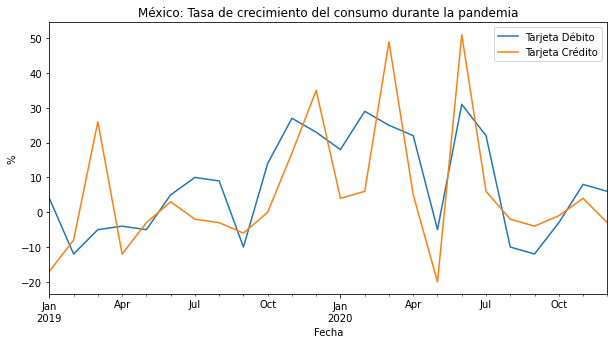

In [125]:
df_cons.plot(figsize=(10,5))
plt.title('México: Tasa de crecimiento del consumo durante la pandemia')
plt.legend(('Tarjeta Débito', 'Tarjeta Crédito'))
plt.ylabel('%')
plt.show()

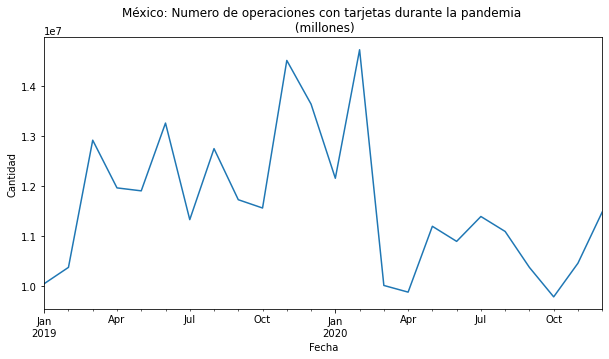

In [126]:
df_tarj.plot(figsize=(10,5), legend=False)
plt.title('México: Numero de operaciones con tarjetas durante la pandemia \n (millones)')
plt.ylabel('Cantidad')
plt.show()
plt.show()

## Impacto sobre el empleo

Información del sitio web de la Secretaria del Trabajo y Prevision Social https://www.gob.mx/stps 

En el periodo que va de marzo a junio de 2020 se perdieron poco más de 1.1 millones de empleos formales, una reducción de 5.4%
de todos los empleos formales registrados ante el IMSS. El grueso de la pérdida ocurrió en los meses de abril a mayo, en los cuales se perdieron 900 mil empleos.

In [77]:
df_wk= pd.read_csv('total_trabajadores.csv') #Cargamos el dataset sobre el empleo 

In [78]:
df_wk['Fecha'] = pd.to_datetime(df_wk['Fecha'], errors='coerce')
df_wk= df_wk.set_index('Fecha')


In [79]:
df_wk['Trabajadores Permanentes']= df_wk['Trabajadores Permanentes'].astype(float)

In [80]:
df_wk['Empleos Perdidos']=df_wk['Trabajadores Permanentes'].diff() #Se calucula la diferencia de los empleos perdidos
df_wk

,Trabajadores Permanentes,Empleos Perdidos
Fecha,,
2019-09-30,20567426.0,NaN
2019-10-31,20727424.0,159998.0
2019-11-30,20803652.0,76228.0
2019-12-31,20421442.0,-382210.0
2020-01-31,20490397.0,68955.0
2020-02-29,20613536.0,123139.0
2020-03-31,20482943.0,-130593.0
2020-04-30,19927696.0,-555247.0
2020-05-31,19583170.0,-344526.0


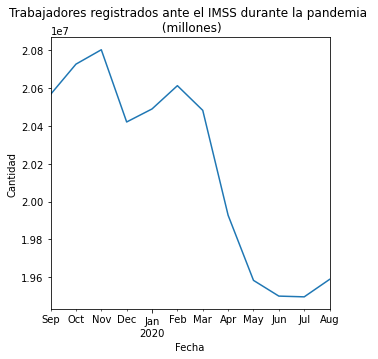

In [135]:
df_wk['Trabajadores Permanentes'].plot(figsize=(5,5))
plt.title('Trabajadores registrados ante el IMSS durante la pandemia \n (millones)')
plt.ylabel('Cantidad')
plt.show()


Text(0, 0.5, 'Cantidad')

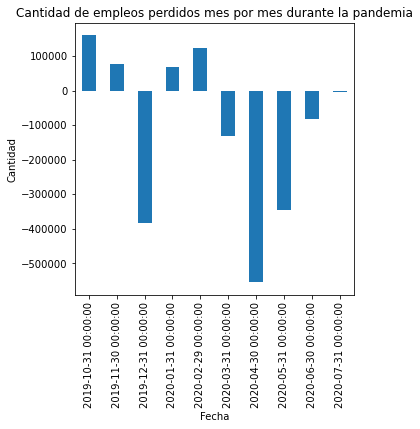

In [136]:
df_wk.loc['2019-10-01':'2020-08-01']['Empleos Perdidos'].plot(figsize=(5,5), kind= 'bar', x= ['Fecha'])
plt.title('Cantidad de empleos perdidos mes por mes durante la pandemia')
plt.ylabel('Cantidad')

In [53]:
print(str('En Julio se registró la menor cantidad de trabajadores registrados antes el IMSS con ') + str(df_wk['Trabajadores Permanentes'].min().astype(int))+ str(' Pero en Abril se registró el máximo despido de trabajadores con ')+ str(df_wk['Empleos Perdidos'].min().astype(int)*-1))

En Julio se registró la menor cantidad de trabajadores registrados antes el IMSS con 19495952 Pero en Abril se registró el máximo despido de trabajadores con 555247


In [54]:
print(str('De Marzo a Julio se perdieron ') + str(df_wk.loc['2020-03-31':'2020-07-31']['Empleos Perdidos'].sum().astype(int)*-1) + str(' empleos.'))

De Marzo a Julio se perdieron 1117584 empleos.


## Inflación

La inflación es un fenómeno que se observa en la economía de un país y está relacionado con el aumento desordenado de los precios de la mayor parte de los bienes y servicios. Para medir la inflación, cada mes el INEGI da seguimiento a 235 mil precios en 46 ciudades del país.

De acuerdo con un análisis del periódico El Universal la inflación acumulada entre marzo y agosto del 2020, es decir, durante los seis meses de la pandemia por coronavirus en México, fue de 0.91%.
La inflación subyacente, considerada un mejor parámetro para medir la trayectoria de los precios porque elimina productos de alta volatilidad, registró una variación en su medición anual del 3.99%.


In [9]:
df_if= pd.read_csv('Inflacion.csv') #información de Banco de México
df_if.describe()


,INPC,Inflacion Subyacente
count,20.000000,20.00000
mean,0.231000,0.31300
std,0.405345,0.08157
min,-1.010000,0.16000
25%,0.032500,0.25750
50%,0.380000,0.31000
75%,0.495000,0.36250
max,0.810000,0.46000


In [139]:
df_if['Fecha'] = pd.to_datetime(df_if['Fecha'], errors='coerce')
df_if= df_if.set_index('Fecha')

In [140]:
df_if['INPC']= df_if['INPC'].astype(float)

Text(0, 0.5, '%')

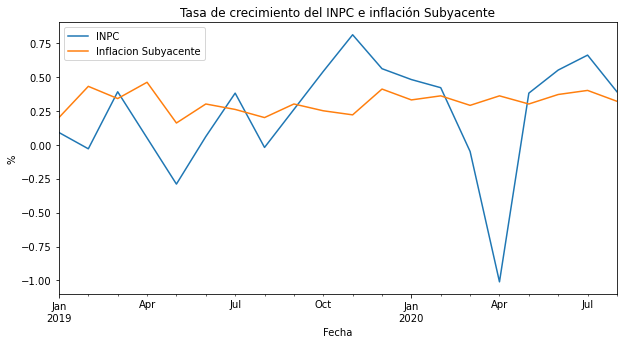

In [141]:
df_if.plot(figsize=(10,5))
plt.title('Tasa de crecimiento del INPC e inflación Subyacente')
plt.ylabel('%')

## Tipo de cambio
El dólar se ofreció el viernes 20 de marzo hasta en 25.11 pesos en bancos, como es el caso de Citibanamex. En tanto, BBVA México lo hizo en 24.77 pesos y Banorte en 24.75 pesos. Como se puede observar el impacto en la economía mexicana empieza en marzo de 2020, todo esto por la situación política y económica internacional; de manera interna, por las medidas sanitarias implementadas.

In [142]:
df_tc= pd.read_csv('tipo de cambio.csv')#Información del Banco de México
df_tc

,Fecha,Tipo de cambio
0,02/01/2019,19.5878
1,03/01/2019,19.6073
2,04/01/2019,19.4902
3,07/01/2019,19.3208
4,08/01/2019,19.3479
...,...,...
438,29/09/2020,22.3598
439,30/09/2020,22.1438
440,01/10/2020,21.9562
441,02/10/2020,21.7025


In [143]:
df_tc['Fecha'] = pd.to_datetime(df_tc['Fecha'], errors='coerce')
df_tc= df_tc.set_index('Fecha')
df_tc= df_tc.loc['02/01/2019':'31/08/2020']

In [144]:
df_tc= df_tc.resample('M').max() #Remuestro valores máximos en el mes

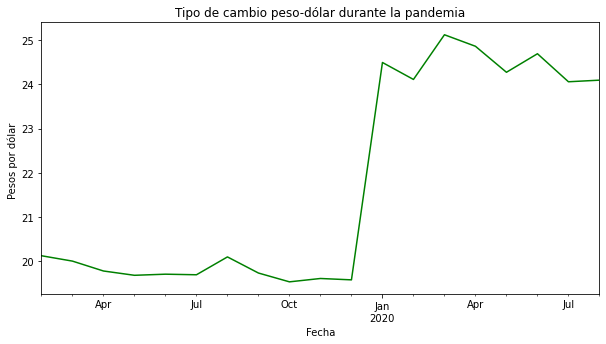

In [147]:
df_tc.plot(figsize=(10,5), legend= False, c='green')
plt.title('Tipo de cambio peso-dólar durante la pandemia')
plt.ylabel('Pesos por dólar ')
plt.show()

In [99]:
df_tc.describe()

,Tipo de cambio
count,19.000000
mean,21.749663
std,2.393200
min,19.535400
25%,19.701850
50%,20.098800
75%,24.189750
max,25.118500


Pandas permite calcular la tasa de crecimiento. De diciembre de 2019 a enero de 2020 el tipo de cambio incrementó en 25% lo que significa una devaluación del peso mexicano.

In [150]:
df_tc['Tasa de crecimiento']= df_tc['Tipo de cambio'].pct_change()
df_tc

,Tipo de cambio,Tasa de crecimiento
Fecha,,
2019-02-28,20.1253,NaN
2019-03-31,20.0039,-0.006032
2019-04-30,19.7806,-0.011163
2019-05-31,19.6834,-0.004914
2019-06-30,19.7084,0.001270
2019-07-31,19.6953,-0.000665
2019-08-31,20.0988,0.020487
2019-09-30,19.7345,-0.018125
2019-10-31,19.5354,-0.010089


## El impacto económico del COVID-19 en las empresas mexicanas

La Encuesta sobre el Impacto Económico Generado por COVID-19 en las Empresas (ECOVID-IE 2020), levantada por el Instituto Nacional de Estadística y Geografía (INEGI) apunta que el 93% de las empresas mexicanas presentó algún tipo de afectación.

Mientras que casi el 80% negó haber despedido a empleados, el 91% confirmó reducciones en sus ingresos. Asimismo, el 81% declaró que no redujo el monto total de las remuneraciones y/o prestaciones del personal. Por otro lado, casi tres cuartas partes de las empresas afirmaron que hubo una disminución de la demanda y cancelación de pedidos y casi la mitad reportó una menor disponibilidad de flujo de efectivo.

Estos datos sugieren que, de manera general, las empresas mantuvieron sus gastos mientras sus ingresos disminuyeron, derivado de la reducción del consumo por parte de sus clientes. Ante los impactos de la pandemia, casi la mitad de las empresas optó por la implementación de entregas a domicilios y el 30% decidió ofrecer sus productos o servicios por medios digitales.

## Análisis
### Empresas que sufrieron algún tipo de afectación

In [11]:
df_encuesta= pd.read_csv('tr_ecovid_ie_2020.csv')
df_encuesta

,DOMINIO_ESTUDIO,C_1,D_1,E_1,F_1,G_1,H_1,I_1,J_1,K_1,...,F_11,G_11,H_11,C_12,D_12,E_12,F_12,G_12,H_12,ESTATUS
0,total,1873564.0,1.659435e+06,618946.384984,1.430425e+06,1.085076e+06,1.387084e+06,428325.566998,895475.867688,44948.887573,...,431966.937733,31.384124,767129.997490,1873564.0,78966.336276,24.409161,1.329839e+06,51.174524,464758.880617,Cifras Definitivas
1,esenciales,926502.0,8.323134e+05,318863.973777,7.329009e+05,5.586774e+05,7.171024e+05,217196.268960,470558.178885,15485.492474,...,192701.049826,29.454451,394638.520298,926502.0,42039.688459,22.916971,6.345526e+05,50.149958,249909.694945,Cifras Definitivas
2,no_esenciales,947062.0,8.271213e+05,300082.411207,6.975244e+05,5.263982e+05,6.699819e+05,211129.298038,424917.688803,29463.395098,...,239265.887907,32.938252,372491.477192,947062.0,36926.647817,26.107967,6.952862e+05,52.109593,214849.185672,Cifras Definitivas
3,grandes,16893.0,1.673828e+04,14422.273138,1.521172e+04,1.451588e+04,1.481255e+04,14647.918212,14446.874193,1838.981138,...,4622.069827,28.539390,7676.279752,16893.0,431.673007,29.898746,1.275572e+04,40.805382,3705.604643,Cifras Definitivas
4,med_y_peq,128261.0,1.177415e+05,57297.939828,1.062211e+05,8.303089e+04,1.008018e+05,53985.263035,75730.062630,4711.130245,...,31474.071562,31.185577,54705.189967,128261.0,4559.019959,25.573832,9.399509e+04,47.514437,29706.893972,Cifras Definitivas
5,micros,1728410.0,1.524955e+06,547226.172018,1.308992e+06,9.875289e+05,1.271470e+06,359692.385751,805298.930865,38398.776189,...,395870.796344,31.433124,704748.527771,1728410.0,73975.643309,24.305350,1.223088e+06,51.563944,431346.382001,Cifras Definitivas


In [49]:
#Composición de las empresas mexicanas por tamaño
micros= round((1728410/1873564)*100)
med_peq= round((128261/1873564)*100)
grandes= round((16893/1873564)*100)
print("Las microempresas representan el "+ (str(micros))+"%" + " del total de las empresas que hay en México.")
print("Las pequeñas y medianas representan el "+ (str(med_peq))+"%" + " del total.")
print("Las grandes empresas representan el "+ (str(grandes))+"%" + " del total.")

Las microempresas representan el 92% del total de las empresas que hay en México.
Las pequeñas y medianas representan el 7% del total.
Las grandes empresas representan el 1% del total.


In [47]:
#Empresas que sufrieron algún tipo de afectación
afectacion= np.array(df_encuesta.iloc[[0], [32]])
total= np.array(df_encuesta.iloc[[0], [1]])
eta= np.round((afectacion/total)*100, 2)
print(str("La Encuesta sobre el Impacto Económico Generado por COVID-19 en las Empresas (ECOVID-IE 2020),levantada por el Instituto Nacional de Estadística y Geografía (INEGI) apunta que el ")+ str(eta)+ "%" + " sufrió un tipo de afectación.")

La Encuesta sobre el Impacto Económico Generado por COVID-19 en las Empresas (ECOVID-IE 2020),levantada por el Instituto Nacional de Estadística y Geografía (INEGI) apunta que el [[93.19]]% sufrió un tipo de afectación.


### Instrumentación de paros técnicos o cierres temporales

In [51]:
df_paro= pd.read_csv('tr_ecovid_instrum_paros_tecnicos_2020.csv')
df_dias= pd.read_csv('tr_ecovid_dias_nat_vig_paro_2020.csv')
df_paro

,DOMINIO_ESTUDIO,C_1,D_1,E_1,F_1,G_1,H_1,I_1,J_1,K_1,...,J_7,K_7,L_7,M_7,N_7,O_7,P_7,Q_7,R_7,ESTATUS
0,Instrumentación de paros técnicos o cierres te...,1.873564e+06,1.127886e+06,367323.477393,59.502896,224295.552400,507556.917736,333922.833942,381560.324214,95394.057892,...,35.927561,431966.937733,31.384124,767129.997490,78966.336276,24.409161,1.329839e+06,51.174524,464758.880617,Cifras Definitivas
1,Instrumentación de paros técnicos o cierres te...,1.115983e+06,6.649126e+05,239115.246570,63.315407,143854.244013,280741.077640,217953.444127,239345.135659,54152.074642,...,38.570339,306987.696977,32.781488,419722.998777,43910.199255,25.252062,8.357779e+05,53.682202,236294.695441,Cifras Definitivas
2,Instrumentación de paros técnicos o cierres te...,7.575812e+05,4.629735e+05,128208.230823,52.392358,80441.308387,226815.840096,115969.389815,142215.188556,41241.983251,...,32.320346,124979.240756,27.951765,347406.998713,35056.137020,23.353370,4.940608e+05,46.932410,228464.185176,Cifras Definitivas


In [54]:
paro_si= np.array(df_paro.iloc[[1], [1]])
reduccion= np.array(df_encuesta.iloc[[0], [35]]) #Reducción de trabajadores_no
rdt= np.round((reduccion/total)*100, 2)
print(rdt)

disminucion= np.array(df_paro.iloc[[1],[23]])#Empresas que vieron reduccion en sus ingresos
n_disminucion= np.round((disminucion/paro_si)*100, 2)
print(n_disminucion)

demanda= np.array(df_encuesta.iloc[[0], [45]]) #Empresas que vieron una disminucion en la demanda y cancelación de pedidos
n_demanda= np.round((demanda/total)*100, 2)
print(n_demanda)
flujo_efectivo= np.array(df_encuesta.iloc[[0], [48]]) #Empresas que reportaron una menor disponibilidad de flujo de efectivo.
n_flujo_efectivo= np.round((flujo_efectivo/total)* 100, 2)
print(n_flujo_efectivo)



[[78.86]]
[[90.61]]
[[67.64]]
[[42.68]]


## Implementaciones y Apoyos

La ECOVID-IE 2020 también apunta que únicamente el 7.83% de las empresas recibió algún tipo de apoyo, en su mayoría de carácter gubernamental; las razones por las cuales las empresas no han recibido apoyos durante la contingencia se deben mayormente a la falta de información en cuanto a la disponibilidad de estos y de los procedimientos de solicitud. En la siguiente gráfica se muestran detalladamente las causas por las cuales las empresas no han recibido el apoyo económico gubernamental durante la pandemia.

In [56]:
entregas_domicilio= np.array(df_paro.iloc[[0], [6]]) #Numero de empresas que optó por la implementación de entregas a domicilio
n_entregas_domicilio= np.round((entregas_domicilio/total)*100,2)

entrega_digital= np.array(df_paro.iloc[[0], [7]])# Numero de empresas que decidió ofrecer sus productos o servicios por medios digitales
n_entregas_digitales= np.around((entrega_digital/total)*100,2)

apoyo= np.array(df_encuesta.iloc[[0], [60]]) #Total de empresas que recibieron algun tipo de apoyo
n_apoyo= np.around((apoyo/total)*100,2)


### Razones por las que no se recibieron apoyos durante la pandemia

In [58]:
no_conocimiento= np.array(df_encuesta.iloc[[0],[66]])#No se tenia conocimiento
n_no_conocimiento= np.round((no_conocimiento/total)*100,2)
sin_conocimiento= float(n_no_conocimiento)

complicado= np.array(df_encuesta.iloc[[0],[67]]) #Solicitar es demasiado complicado
n_complicado= np.round((complicado/total)*100,2)
demasiado_complicado= float(n_complicado)

requisitos= np.array(df_encuesta.iloc[[0],[68]]) #No se cumplen con los requisitos
n_requisitos= np.round((requisitos/total)*100,2)
no_requisitos= float(n_requisitos)

no_apoyo= np.array(df_encuesta.iloc[[0],[69]]) #Se solicitó pero no se recibió el apoyo
n_no_apoyo= np.round((no_apoyo/total)*100,2)
sin_apoyo= float(n_no_apoyo)

no_necesario= np.array(df_encuesta.iloc[[0], [70]])#No ha sido necesario solicitar apoyo
n_no_necesario= np.around((no_necesario/total)*100,2)
sin_necesidad= float(n_no_necesario)

otra= np.array(df_encuesta.iloc[[0], [71]]) #Otra
n_otra=  np.around((otra/total)*100,2)
otras= float(n_otra)

### Gráfica de pastel

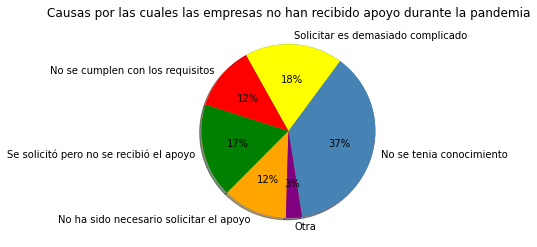

In [60]:
labels = 'No se tenia conocimiento', 'Solicitar es demasiado complicado', 'No se cumplen con los requisitos','Se solicitó pero no se recibió el apoyo', 'No ha sido necesario solicitar el apoyo', 'Otra'
data = [sin_conocimiento, demasiado_complicado, no_requisitos, sin_apoyo, sin_necesidad, otras]
 
fig1, ax1 = plt.subplots()
g= ax1.pie(data)
angle = -180 * data[0]
ax1.pie(data, explode=None, labels=labels, autopct='%.0f%%', shadow= True, startangle=angle, 
        colors=['SteelBlue','Yellow', 'Red','Green','Orange','Purple'])
ax1.set(title='Causas por las cuales las empresas no han recibido apoyo durante la pandemia')

plt.show()

## Regresión lineal

Con todas las afectaciones que ha tenido la economía mexicana se realizará una predicción del crecimiento del Producto Interno Bruto (PIB), pero de manera mensual por lo que se tomó el Indicador Global de la Actividad Económica (IGAE) y Indicador Mensual de la Formación Bruta de Capital Fijo (IMFBCF). De acuerdo con el INEGI, el IMFBCF  permite un amplio conocimiento sobre el comportamiento de la inversión en el corto plazo, misma que está integrada por los bienes utilizados en el proceso productivo durante más de un año y que están sujetos a derechos de propiedad. Este indicador muestra cómo una gran parte del nuevo valor agregado bruto en la economía se invierte, en lugar de ser consumido.

Para poder realizar la regresión se utilizó __scikit-learn__

In [61]:
df_ig= pd.read_csv('igae_var_anual2.csv')


In [62]:
df_ig.dropna()

,Fecha,Inversion Fija Bruta,Indicador Global de la Actividad Económica
1,31/01/2018,1.1,1.3
2,28/02/2018,4.3,2.2
3,31/03/2018,2.8,2.8
4,30/04/2018,5.3,2.1
5,31/05/2018,3.7,3.1
6,30/06/2018,2.3,2.0
7,31/07/2018,4.1,3.1
8,31/08/2018,-1.8,2.3
9,30/09/2018,0.3,3.3
10,31/10/2018,1.9,1.8


In [63]:
df_ig['Fecha'] = pd.to_datetime(df_ig['Fecha'], errors='coerce')
df_ig= df_ig.set_index('Fecha')

En la siguiente gráfica se muestra el comportamiento de los dos indicadores, en el que se observa que tienen casi el mismo comportamiento durante la pandemia.

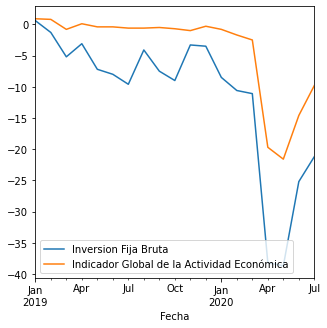

In [64]:
df_ig= df_ig.loc['2019-01-31':'2020-07-31']
df_ig.plot(figsize=(5,5))
plt.show()

Realizamos una gráfica de dispersión para ver si hay una relación lineal entre los dos indicadores.

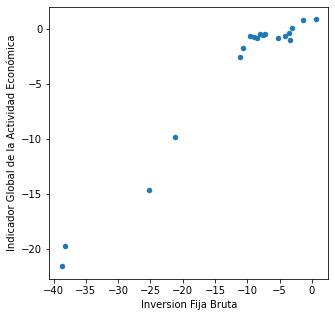

In [65]:
df_ig.plot.scatter(figsize=(5,5), x='Inversion Fija Bruta', y='Indicador Global de la Actividad Económica')
plt.show()

In [66]:
igae= df_ig['Indicador Global de la Actividad Económica'].values #Nos quedamos unicamente con los valores de nuestras variables
ifb= df_ig['Inversion Fija Bruta'].values

In [72]:
X= np.array([ifb]).T #Convertimos a numpy y le hacemos la transpuesta para que nos quede una matriz
Y= np.array(igae) #Vector

Entrenamos el modelo

In [73]:
reg= LinearRegression()
reg= reg.fit(X,Y)

In [74]:
Y_pred= reg.predict(X)

Se calcula el error de estimacion

In [75]:
error= np.sqrt(mean_squared_error(Y,Y_pred))

Calculo de la r^2 

In [76]:
r2= reg.score(X,Y)

El modelo nos arroja que efectivamente la inversión fija bruta de capital (X) puede explicar el crecimiento de la actividad económica (Y). Es decir, cuando la inversión crece un punto porcentual, la producción lo hará en 3%, segun los resultados preedichos por modelo. 

El modelo está muy bien explicado pues el r2 arroja un valor muy cercano a uno, lo que quiere decir que el modelo se explica muy bien. Ademas, el término de error es muy bajo.

In [38]:
print("El error es: " + str(error))
print("El valor de r2 es: " + str(r2))
print("Los coeficientes son: \n" + str(reg.coef_ ))
ifb= 1.0
print("El IGAE será de: \n" + str(reg.predict([[ifb]])))

El error es: 1.4760333778576298
El valor de r2 es: 0.9534277188774308
Los coeficientes son: 
[0.60088964]
El IGAE será de: 
[3.4856794]
